In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [3]:
symbols = [
    'AAPL',
    'MSFT',
    'META',
    'AMZN',
    'XOM',
    'UNH',
    'JNJ',
    'V',
    'HD',
    'ABBV',
    'KO',
    'DIS',
    'T',
    'UPS',
    'LMT',
    'CAT',
    'F',
    'MAR',
    'O',
    'HSY'
]

In [4]:
data = yf.download(symbols, start="2018-01-01", end="2024-03-31")
data.head()

[*********************100%%**********************]  20 of 20 completed


Price       Adj Close                                                          \
Ticker           AAPL       ABBV       AMZN         CAT         DIS         F   
Date                                                                            
2018-01-02  40.670971  73.593407  59.450500  135.362244  108.372856  9.247079   
2018-01-03  40.663891  74.745064  60.209999  135.569168  108.838135  9.320120   
2018-01-04  40.852776  74.318771  60.479500  137.430954  108.789688  9.480810   
2018-01-05  41.317898  75.612518  61.457001  139.603134  108.198372  9.641501   
2018-01-08  41.164436  74.401039  62.343498  143.111328  106.647415  9.604982   

Price                                                     ...   Volume  \
Ticker              HD        HSY         JNJ         KO  ...      LMT   
Date                                                      ...            
2018-01-02  161.601105  97.810432  117.502678  37.357071  ...  1189600   
2018-01-03  162.443375  97.400375  118.625130  37.275040  ...   893400   
2018-01-04  163.732605  98.080872  118.616699  37.800034  ...  1443000   
2018-01-05  165.442841  98.552010  119.595695  37.791836  ...  1241100   
2018-01-08  165.047440  99.511711  119.747604  37.734402  ...  1084500   

Price                                                                         \
Ticker          MAR      META      MSFT        O         T      UNH      UPS   
Date                                                                           
2018-01-02  2949200  18151900  22483800  1672872  42626974  3485000  5413000   
2018-01-03  1507900  16886600  26061400  1593408  51851150  2417600  5655600   
2018-01-04  3187000  13880900  21912000  1939334  36894187  2749100  5473100   
2018-01-05  3404400  13574500  23407100  1471219  29386048  2432800  3699200   
2018-01-08  3275500  17994700  22113000  1133342  35276524  2850800  3243000   

Price                          
Ticker            V       XOM  
Date                           
2018-01-02  6080900  11469300  
2018-01-03  6946100  13957700  
2018-01-04  7805300  10863000  
2018-01-05  8590500  11047600  
2018-01-08  6660700  10927100  

[5 rows x 120 columns]

In [5]:
portfolio_returns = data['Adj Close'].pct_change().dropna()

port_comps_rets_cumprod = portfolio_returns.add(1).cumprod().sub(1)*100

fig = px.line(port_comps_rets_cumprod,
              x=port_comps_rets_cumprod.index,
              y=port_comps_rets_cumprod.columns,
              title='Cumulative Returns of Portfolio Stocks (2018-2024)')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return  ')

fig.show()

In [6]:
sp_index = yf.download('^GSPC', start='2018-01-01', end="2023-02-28")
sp_index.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000


<Axes: xlabel='Ticker', ylabel='Ticker'>

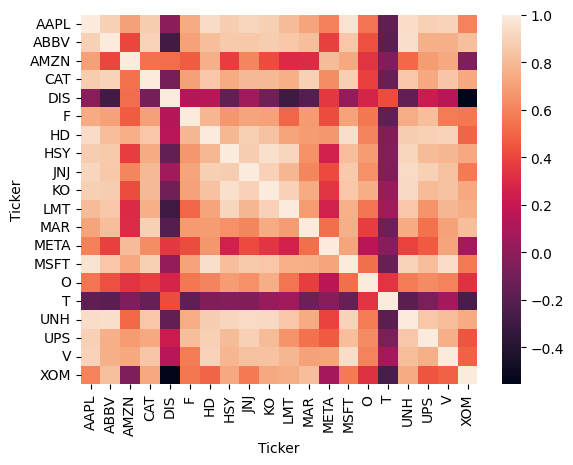

In [7]:
port_corr = port_comps_rets_cumprod.corr()

sns.heatmap(port_corr)